# <u>Projet 2: Analyser des données de systèmes éducatifs</u>

### <u>Sommaire</u>

- <a href ="#0"> Introduction </a>
- 1. <a href ="#1"> Importer les données </a>
- 2. <a href ="#2"> Découvrir les fichiers </a><br/>
    2.1. <a href ="#21"> En utilisant des fonctions du Python </a><br/>
    2.2. <a href ="#22"> En utilisant la librairie Missingno </a>
- 3. <a href ="#3"> Choisir les Indicateurs </a>  
- 4. <a href ="#4"> Analyser la période </a>  
- 5. <a href ="#5"> Analyser les pays </a>  
- 6. <a href ="#6"> Avoir le DataFrame final </a>  
- 7. <a href ="#7"> Choisir un seul Indicateur le mieux rempli  </a> 
- 8. <a href ="#8"> Remplir les données manquantes  </a> 
- 9. <a href ="#9"> Vérifier la qualité de remplissage par Z-Score  </a> 
- 10. <a href ="#10"> Scoring: Trouver les pays les plus potentiels   </a> <br/>
    10.1. <a href ="#101"> Filtrer les vrais pays </a><br/>
    10.2. <a href ="#102"> Uniformiser les Indicateurs </a><br/>
    10.3. <a href ="#103"> Faire le Scoring </a><br/>
- <a href ="#11"> Conclusion générale </a>    


## <a name = "0">Introduction</a>

<div style="text-align: justify"> Le but du deuxième projet est d'explorer un jeu de données pour choisir des indicateurs qui répondent à la demande du manager. Il souhaite réaliser un projet d'expansion à l'internationale. C'est pour cela, Il faut faire une analyse parmi ces données pour trouver les pays qui ont un fort potentiel de clients. </div>         



## <a name = "1">Importer les données</a>

<div style="text-align: justify"> Tout d'abord, Il faut télécharger les fichiers données qui se trouvent sur le lien <a href="https://datacatalog.worldbank.org/dataset/education-statistics" >Education Statistics</a>. Pour importer les données, on utilise la librairie <b>Pandas</b>. On importe aussi <b>Numpy</b> qui est indispensable pour certaines opérations logiques. <b>Missingo</b> qui décrit les données. <b>Matplotlib</b> pour imprimer des figures. <b>scipy.stats</b> pour avoir des calculs statistiques. <b>MinMaxScaler</b> pour uniformiser les données. Enfin, on lit les fichiers en utilisant read_csv dans des dataframes que je les ai nommées df1,df2,... </div>

In [1]:
import pandas as pd
import numpy as np
import missingno
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

df1 = pd.read_csv('./EdStatsCountry.csv')
df2 = pd.read_csv('./EdStatsCountry-Series.csv')
df3 = pd.read_csv('./EdStatsData.csv')
df4 = pd.read_csv('./EdStatsFootNote.csv')
df5 = pd.read_csv('./EdStatsSeries.csv')


## <a name = "2">Découvrir les fichiers</a>

### <a name = "21">En utilisant des fonctions du Python</a>

<div style="text-align: justify"> On peut simplement écrire par exemple df1 pour l'afficher mais le fichier est très grand et on ne peut pas tout voir. C'est pour cela, on peut utiliser des fonctions comme : 

- **.head()**   pour voir les premières lignes
- **.columns**  pour voir les noms de toutes les colonnes 
- **.loc[]**    par exemple, en mettant l'Index d'une ligne, on peut avoir toutes les informations de cette ligne
- **.dtypes**   pour voir les différents types de valeurs 
- **.describe()** Donne des calculs statistiques sur les données comme moyenne, écart-type, quartiles... 
- **.info()** Donne le nombre de valeurs par colonne avec leur type

Au-dessous, je montre des exemples de ces fonctions sans tout mettre car cela prend une grande place et ce n'est pas essentiel pour comprendre l'idée.</div>

In [5]:
df1

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,XKX,Kosovo,Kosovo,Republic of Kosovo,NaN,Euro,"Kosovo became a World Bank member on June 29, ...",Europe & Central Asia,Lower middle income,KV,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
237,YEM,Yemen,"Yemen, Rep.",Republic of Yemen,YE,Yemeni rial,Based on official government statistics and In...,Middle East & North Africa,Lower middle income,RY,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
238,ZAF,South Africa,South Africa,Republic of South Africa,ZA,South African rand,Fiscal year end: March 31; reporting period fo...,Sub-Saharan Africa,Upper middle income,ZA,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN
239,ZMB,Zambia,Zambia,Republic of Zambia,ZM,New Zambian kwacha,National accounts data have rebased to reflect...,Sub-Saharan Africa,Lower middle income,ZM,...,General Data Dissemination System (GDDS),2010,"Demographic and Health Survey (DHS), 2013","Integrated household survey (IHS), 2010",NaN,2010. Population and Housing Census.,NaN,2011.0,2002,NaN


In [6]:
df1.head()

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


In [7]:
df1.columns

Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')

In [8]:
df1.loc[0]

Country Code                                                                                       ABW
Short Name                                                                                       Aruba
Table Name                                                                                       Aruba
Long Name                                                                                        Aruba
2-alpha code                                                                                        AW
Currency Unit                                                                            Aruban florin
Special Notes                                        SNA data for 2000-2011 are updated from offici...
Region                                                                       Latin America & Caribbean
Income Group                                                                      High income: nonOECD
WB-2 code                                                                

In [9]:
df1.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [10]:
df1.describe()

,National accounts reference year,Latest industrial data,Latest trade data,Unnamed: 31
count,32.00000,107.000000,185.000000,0.0
mean,2001.53125,2008.102804,2010.994595,NaN
std,5.24856,2.616834,2.569675,NaN
min,1987.00000,2000.000000,1995.000000,NaN
25%,1996.75000,2007.500000,2011.000000,NaN
50%,2002.00000,2009.000000,2012.000000,NaN
75%,2005.00000,2010.000000,2012.000000,NaN
max,2012.00000,2010.000000,2012.000000,NaN


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

### <a name = "22">En utilisant la librairie Missingno</a>

<div style="text-align: justify"> *Missingno est une librairie simple et efficace qui décrit le taux de remplissage des données et même les relations entre elles. Quatre méthodes de Missingno nous donnent un graphique expliquant les données. On utilise la méthode la plus adapté à notre besoin.</div><br>
<div style="text-align: justify">
    
- **missingno.bar**         donne des barres avec le nombre de valeurs de chaque colonne (on peut aussi avoir des barres logarithmiques)
- **missingno.matrix**      présente la distribution des valeurs manquantes mais précise mieux le lieu de ces valeurs
- **missingno.heatmap**    décrit la relation entre les variables avec une échelle de corrélation entre -1 à +1. Plus la corrélation est proche de +1 plus la relation est plus forte. La corrélation 0 est à dire qu'il n'y a pas de corrélation.
- **missingno.dendrogram**  présente un dendrogramme qui montre la relation entre les valeurs manquantes par des clusters hiérarchiques. Si deux variables sont dans le même cluster, c'est à dire que la relation est plus forte.</div><br>
<div style="text-align: justify">Enfin, j'ai trouvé la méthode la plus adaptée au projet2 est missingno.bar.Au-dessous, on va voir l'application de cette méthode en choisissant un ordre croissant ("ascending").<br>
Pour installer Missingno, il suffit d'exécuter la ligne : pip install missingno. On peut l'exécuter sur Anaconda Prompt, et aussi sur Jupyter mais il faut mettre la signe (!) avant la commande.<br><br> 
**Source : <a href="https://coderzcolumn.com/tutorials/data-science/missingno-visualize-missing-data-in-python" >Missingno</a>* </div>

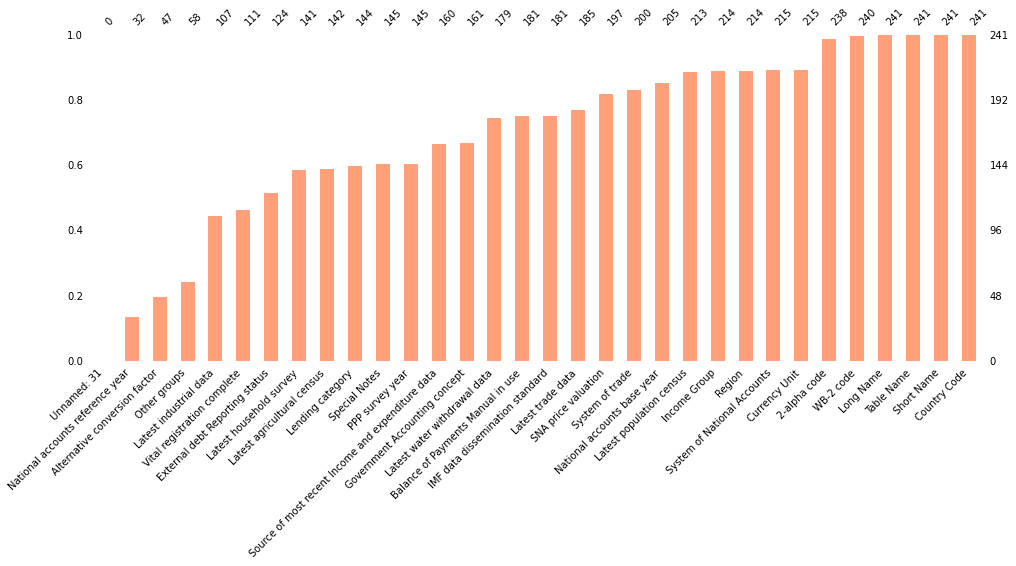

In [12]:
missingno.bar(df1, color="lightsalmon", sort="ascending", figsize=(16,6), fontsize=10);

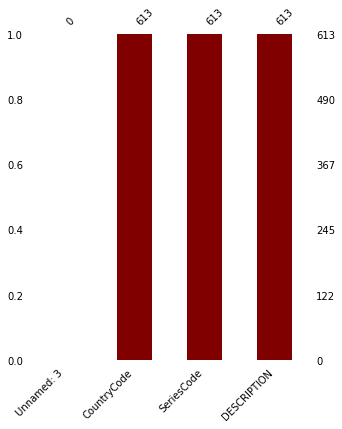

In [13]:
missingno.bar(df2, color="maroon", sort="ascending", figsize=(5,6), fontsize=10);

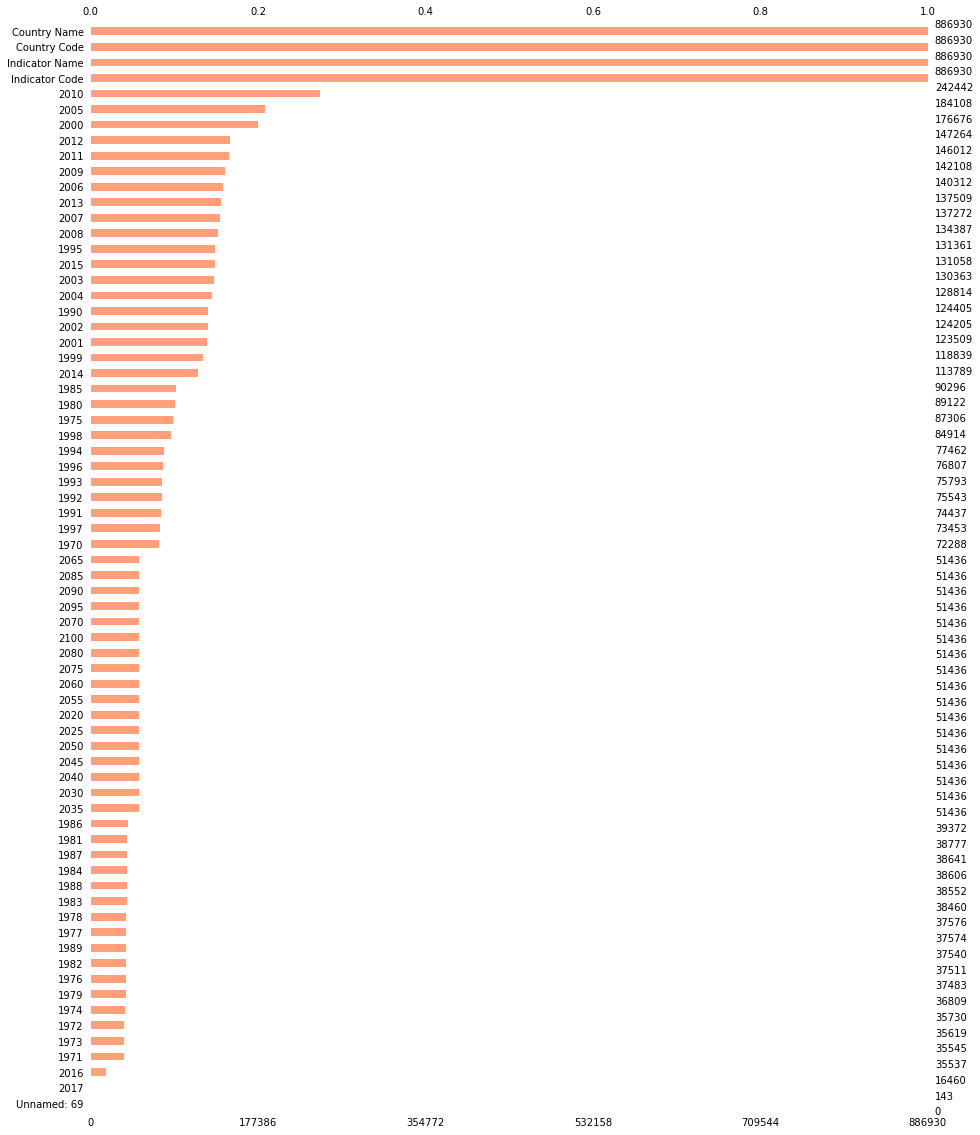

In [14]:
missingno.bar(df3, color="lightsalmon", sort="ascending", figsize=(15,20), fontsize=10);

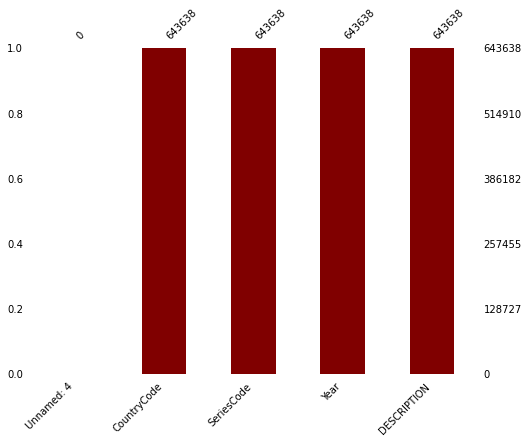

In [15]:
missingno.bar(df4, color="maroon", sort="ascending", figsize=(8,6), fontsize=10);

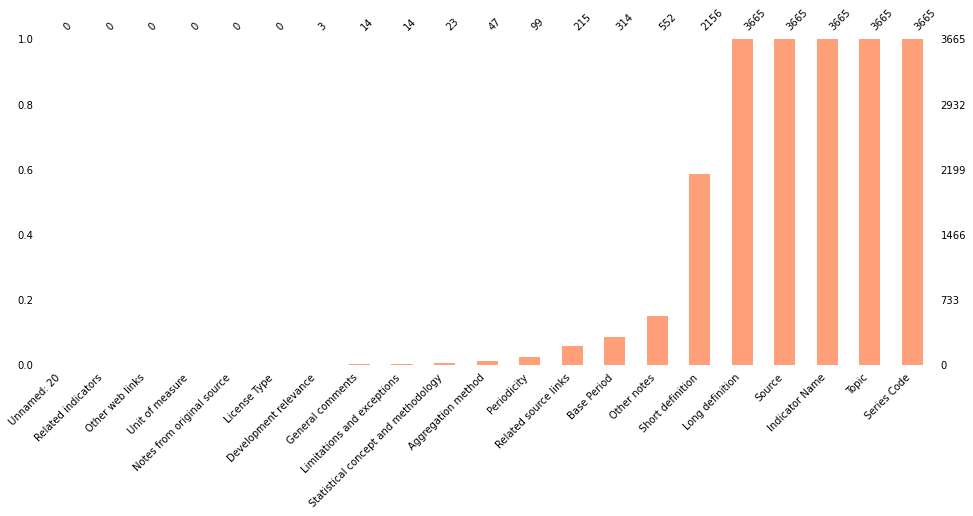

In [16]:
missingno.bar(df5, color="lightsalmon", sort="ascending", figsize=(16,6), fontsize=10);

## <a name = "3">Choisir les Indicateurs</a>

<div style="text-align: justify"> Les Indicateurs choisis doivent être en lien avec la demande du manager. On trouve ces Indicateurs sur le site <a href="https://datatopics.worldbank.org/education/indicators" >Available Indicators</a>. Ensuite, on doit vérifier si l'Indicateur choisis existe dans nos fichiers. Donc, j'ai utilisé une ligne de code (.loc) avec une condition  qui est le code de l'Indicateur 'Indicator Code', ou on peut aussi utiliser le nom de l'Indicateur 'Indicator Name' mais Il est préférable d'utiliser le code de l'Indicateur. J'ai choisi des Indicateurs dans 4 thèmes différents : 
</div><br>
<div style="text-align: justify">    
1. Population : 


    1.1. 'Population growth (annual %)' (Indicator Code = SP.POP.GROW). 
    1.2. 'Population, total' (Indicator Code = SP.POP.TOTL).
    1.3. 'Population, female' (Indicator Code = SP.POP.TOTL.FE.IN).
    1.4. 'Population, male' (Indicator Code = SP.POP.TOTL.MA.IN).
    
<div style="text-align: justify">    
2. Education :


    2.1. 'Literacy rate, population 25-64 years, both sexes (%)' (Indicator Code = UIS.LR.AG25T64).
    2.2. 'Population of compulsory school age, both sexes (number)' (Indicator Code = UIS.SAP.CE).
    2.3. 'Duration of compulsory education (years)' (Indicator Code = SE.COM.DURS).  
    2.4. 'Annual statutory teacher salaries in public institutions in USD. Lower Secondary. 15 years of experience' 
    (Indicator Code = OECD.TSAL.2.E15).  
</div>   
<div style="text-align: justify">   
3. Déploiement internet et matériels informatique :


    3.1. 'Personal computers (per 100 people)' (Indicator Code = IT.CMP.PCMP.P2).
    3.2  'Internet users (per 100 people)' (Indicator Code = IT.NET.USER.P2).
</div>  
<div style="text-align: justify"> 
4. Economique : 
 
 
    4.1. 'Labor force, total' (Indicator Code = SL.TLF.TOTL.IN).
    4.2. 'Expenditure on education as % of total government expenditure (%)' (Indicator Code = SE.XPD.TOTL.GB.ZS).
    4.3. 'GNI (current US$)' (Indicator Code = NY.GNP.MKTP.CD).  
4.4. 'GDP at market prices (current US$)' (Indicator Code = NY.GDP.MKTP.CD).
</div>
<div style="text-align: justify">Au-dessous, je montre les deux lignes de codes que j'ai utilisés pour vérifier que ces Indicateurs sont dans nos fichiers. </div>


In [17]:
df3.loc[df3['Indicator Code']== 'IT.NET.USER.P2' ]

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
1375,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5040,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8705,East Asia & Pacific (excluding high income),EAP,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12370,Euro area,EMU,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16035,Europe & Central Asia,ECS,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
869980,Virgin Islands (U.S.),VIR,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
873645,West Bank and Gaza,PSE,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
877310,"Yemen, Rep.",YEM,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
880975,Zambia,ZMB,Internet users (per 100 people),IT.NET.USER.P2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df5.loc[df5['Series Code']== 'SL.TLF.TOTL.IN' ]

,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,...,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
2394,SL.TLF.TOTL.IN,Social Protection & Labor: Labor force structure,"Labor force, total",NaN,Labor force comprises people ages 15 and older...,NaN,Annual,NaN,NaN,Sum,...,NaN,Data up to 2016 are estimates while data from ...,Derived using data from International Labour O...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<div style="text-align: justify"> On remarque qu'il y a dans df3 les colonnes 'Indicator Name' et 'Indicator Code'. Donc, on peut utiliser les deux pour trouver l'Indicateur. Mais, il faut mettre le correspondance dans la deuxième côté de la condition. Alors que, dans df5 il y a que 'Indicator Name'. C'est pour cela, On doit mettre 'Series Code' au lieu de 'Indicator Code'. En général, après avoir creusé dans df5, on peut dire que df5 est moins important que df3 . </div>

## <a name = "4">Analyser la période</a>

<div style="text-align: justify"> Dans le dataframe df3 qu'on a décidé qu'il est le plus imporatant, on remarque que les données sont réparties sur les années. Donc, il est nécessaire de comprendre cette répartition et voir le taux de remplissage par période pour décider quelle est la meilleure période pour l'analyser. Egalement, on s'intéresse à la période la plus récente possible parce que la décision sera mieux si elle est basée sur une période récente. C'est pour cela, j'ai créé la fonction <b><i>analyse_periode(df,rangee,first)</i></b> qui décrit le taux de remplissage par période qu'on peut choisir. 

Dans cette fonction : 
    
<b><i>df </i></b>: est le dataframe sur lequel on applique la fonction.<br/>
<b><i>rangee</i></b> : est la période qu'on souhaite avoir. <br/>
<b><i>first </i></b>: est la première colonne où la fonction va commencer.</div>


In [19]:
def analyse_periode(df,rangee,first):
    
    years=[]
    Percentage=[]
    Non_Empty_Values=[]
    
    for x in range(first,len(df.columns),rangee):
        dfn= df.iloc[:,x:x+rangee] 
        Nonempn=dfn.notnull().sum().sum()
        Non_Empty_Values.append(Nonempn)
        years.append(dfn.columns[0]+'-'+dfn.columns[-1])  
        Percentage.append(int(100*Nonempn/dfn.size))
    
    fig=plt.figure(figsize=(16, 4))
    ax = plt.axes()
    ax.set_facecolor('azure') 
    bars=plt.bar(years, Non_Empty_Values,width=0.3,color=['gold'])
    fig=plt.xlabel("Intervalle des années")
    fig=plt.ylabel("Taux de remplissage")
    i=0
    for g in bars:
        width = g.get_width()
        height = g.get_height()
        x, y = g.get_xy()
        fig=plt.text(x+width/2, y+height*1.001, str(Percentage[i])+'%', ha='center')
        i+=1

    return fig

<div style="text-align: justify">On va mettre les Indicateurs qu'on a choisis dans des listes pour faciliter l'analyse dans les prochaines étapes :</div>

In [20]:
Population=['SP.POP.GROW','SP.POP.TOTL','SP.POP.TOTL.FE.IN','SP.POP.TOTL.MA.IN']
Education=['UIS.LR.AG25T64','UIS.SAP.CE','SE.COM.DURS','OECD.TSAL.2.E15']
Déploiement=['IT.CMP.PCMP.P2','IT.NET.USER.P2']
Economique=['SL.TLF.TOTL.IN','SE.XPD.TOTL.GB.ZS','NY.GNP.MKTP.CD','NY.GDP.MKTP.CD']

In [21]:
dfALLInd=df3.loc[df3['Indicator Code'].isin(Population+Education+Déploiement+Economique)]

<div style="text-align: justify">par la suite <b><i>dfALLInd</i></b> est le dataframe qui contient tous les Indicateurs. A noter que c'est mieux dans ce cas d'avoir tous les Indicateurs ensemble car on décide la période pour tous les Indicateurs. </div>

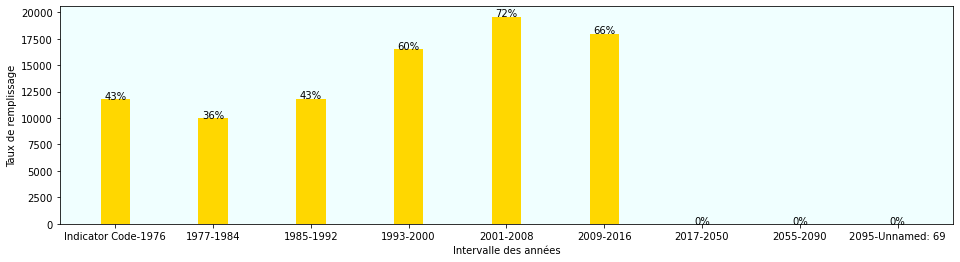

In [22]:
analyse_periode(dfALLInd,8,3);

<div style="text-align: justify">La figure au-dessus est le résultat de l'application de la fonction <b><i>analyse_periode()</i></b>. Des barres représentent le taux de remplissage par période. 8 est la période choisie entre les années. 3 est la troisième colonne dans dfALLInd où la fonction a commencé. 
Donc, la meilleure période pour notre étude sera de 2010 à 2016. Parce qu'à partir de 2017 le taux de remplissage est toujours 0. Et cette période est la plus récente possible.</div>

## <a name = "5">Analyser les pays</a>

<div style="text-align: justify">Des pays sans population ramène aucun résultat pour notre analyse. Donc, Il faut avoir une idée sur la population de chaque pays. J'ai créé la fonction <b><i>analyse_pays(df)</i></b> qui permet d'avoir le taux de remplissage par pays. </div>

In [23]:
def analyse_pays(df):
    
    Non_Empty_Values=[]
    YearStart=df.columns.get_loc('2010')
    YearEnd=df.columns.get_loc('2016')+1

    for x in df['Country Code'].unique():
        dfn=df.loc[df['Country Code']== x]     
        Non_Empty_Values.append(dfn.iloc[:,YearStart:YearEnd].notnull().sum().sum())     
 
    dford=pd.DataFrame(columns=['Country Code','Fill rate'])
    dford['Country Code']=df['Country Code'].unique()
    dford['Fill rate']=Non_Empty_Values
    dford=dford.sort_values(by=['Fill rate'],ascending=False)
    
    fig=plt.figure(figsize=(10, 60))
    ax = plt.axes()
    ax.set_facecolor('turquoise') 
    fig=plt.barh(dford['Country Code'], dford['Fill rate'],height=0.3,color=['red'])
    fig=plt.xlabel("Taux de remplissage")
    fig=plt.ylabel("Pays Code")
    
    return fig

<div style="text-align: justify">Sans oublier que notre intérêt est d'appliquer la fonction sur la population. Donc, voici le dataframe dfpop qui est en lien avec la population uniquement: </div>

In [24]:
dfpop=df3.loc[df3['Indicator Code'].isin(Population)]

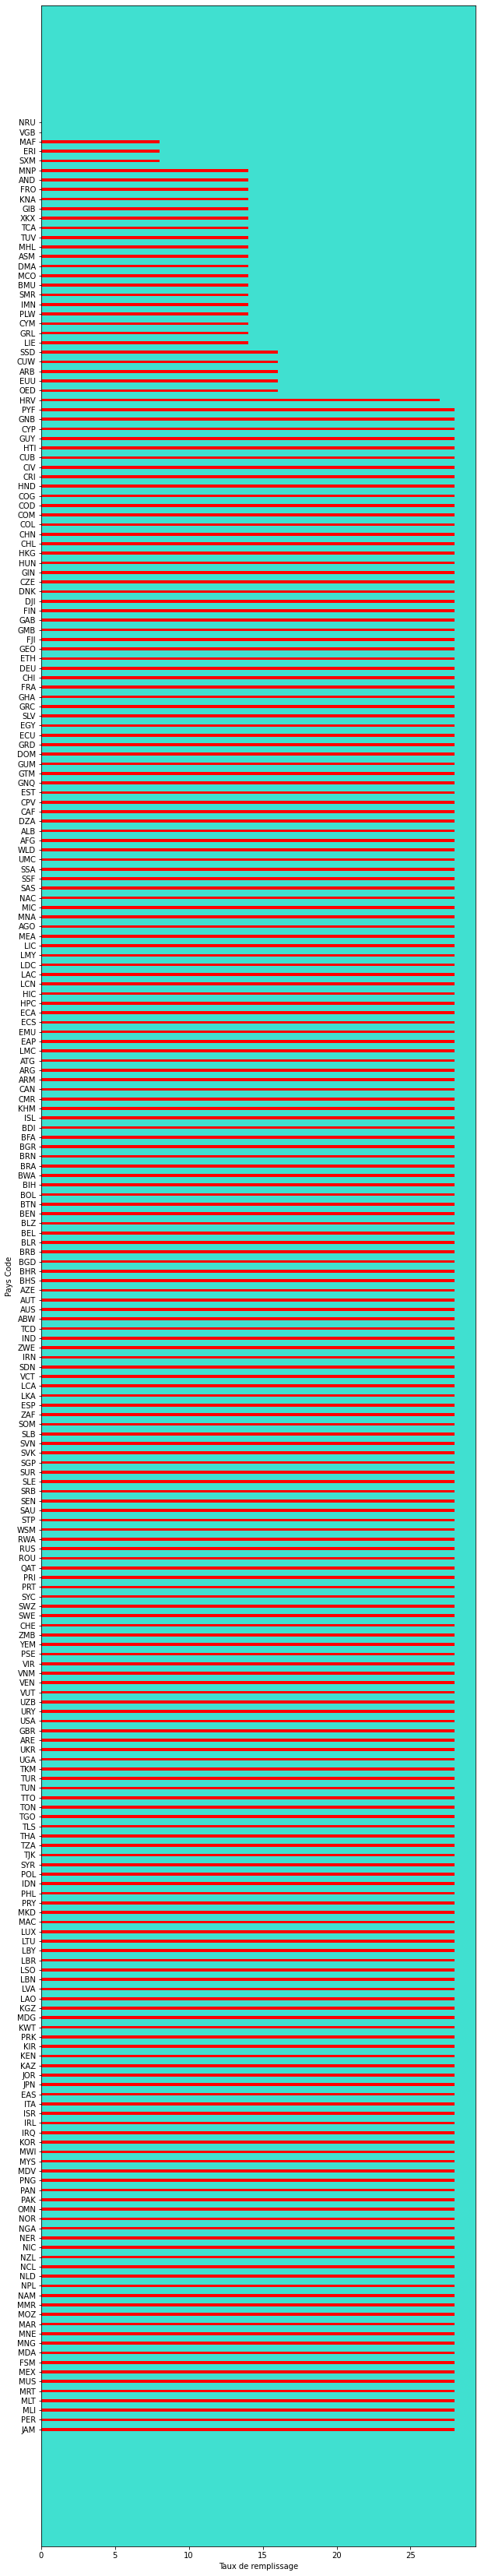

In [25]:
analyse_pays(dfpop);

<div style="text-align: justify">Suite à l'application de la fonction <b><i>analyse_pays() </i></b> deux pays ont un taux de remplissage 0. Ces deux pays sont à éliminer. </div>

## <a name = "6">Avoir le DataFrame final</a>

<div style="text-align: justify">Comme maintenant on connaît quels pays à éliminer et on a décidé la période de l'analyse de 2010 à 2016. Donc, on peut avoir notre dataframe final qui satisfait nos conditions. La fonction <b><i>final(df)</i></b> nous donne le dataframe final prenant en compte nos conditions.  </div>

In [26]:
def final(df):
    
    EmptyCountryPop=['NRU','VGB']
    YearStart=df.columns.get_loc('2010')
    YearEnd=df.columns.get_loc('2016')+1
    prep1=df.iloc[:,0:4]
    prep2=df.iloc[:,YearStart:YearEnd]
    prep3=pd.concat([prep1, prep2],axis=1)
    dffinal=prep3.loc[~prep3['Country Code'].isin(EmptyCountryPop)]
 
    return dffinal

<div style="text-align: justify">
Exemple de l'application de cette fonction sur dfpop. On remarque que les années sont de 2010 à 2016. Le résultat ne continent pas les pays éliminés
</div>

In [27]:
final(dfpop)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
2307,Arab World,ARB,Population growth (annual %),SP.POP.GROW,2.230786e+00,2.128048e+00,2.063874e+00,2.012570e+00,NaN,NaN,NaN
2529,Arab World,ARB,"Population, female",SP.POP.TOTL.FE.IN,1.684030e+08,1.717650e+08,1.751127e+08,1.784644e+08,NaN,NaN,NaN
2531,Arab World,ARB,"Population, male",SP.POP.TOTL.MA.IN,1.793340e+08,1.833720e+08,1.873539e+08,1.912971e+08,NaN,NaN,NaN
2533,Arab World,ARB,"Population, total",SP.POP.TOTL,3.477370e+08,3.551370e+08,3.624666e+08,3.697615e+08,NaN,NaN,NaN
5972,East Asia & Pacific,EAS,Population growth (annual %),SP.POP.GROW,6.757239e-01,6.684309e-01,6.788306e-01,6.764621e-01,6.818708e-01,6.754630e-01,6.830977e-01
...,...,...,...,...,...,...,...,...,...,...,...
882133,Zambia,ZMB,"Population, total",SP.POP.TOTL,1.385003e+07,1.426476e+07,1.469994e+07,1.515321e+07,1.562097e+07,1.610059e+07,1.659139e+07
885572,Zimbabwe,ZWE,Population growth (annual %),SP.POP.GROW,1.976756e+00,2.109672e+00,2.228306e+00,2.309366e+00,2.344799e+00,2.345643e+00,2.336070e+00
885794,Zimbabwe,ZWE,"Population, female",SP.POP.TOTL.FE.IN,7.227111e+06,7.383078e+06,7.551269e+06,7.729043e+06,7.912708e+06,8.099354e+06,8.288086e+06
885796,Zimbabwe,ZWE,"Population, male",SP.POP.TOTL.MA.IN,6.859206e+06,7.003571e+06,7.159557e+06,7.325463e+06,7.498967e+06,7.678097e+06,7.862276e+06


## <a name = "7">Choisir un seul Indicateur le mieux rempli </a>

<div style="text-align: justify">Tout le travial précédent a permis de choisir la période et les pays pour l'étude. Mais on n'a pas encore décidé qui est le meilleur Indicateur de chaque sujet. Et c'est mieux de le choisir après avoir satisfait les conditions par la fonction <b><i>final(df)</i></b>. C'est à dire qu'on va choisir le meilleur Indicateur dans nos conditions. La fonction <b><i>indper(df,IndGr)</i></b> donne le taux de remplissage par Indicateur, d'où :<br>
    
<b><i>df </i></b>: est le dataframe sur lequel on applique la fonction, et dans ce cas c'est le df3 (Car dans cette fonction je créé des dataframe de chaque Indicateur en utilisant le dataframe essentiel qu'on a déjà décidé que c'est df3).<br>
<b><i>IndGr </i></b>: est les Indicateurs regroupés par sujet(Population,Education,Déploiement,Economique). 
</div>

In [28]:
def indper(df,IndGr):
    
    Non_Empty_Values=[]
    Percentage=[]
    
    for x in IndGr:    
        dfs=df.loc[df['Indicator Code']==x]
        finalInd=final(dfs)
        Tocount=finalInd.iloc[:,4:]
        Non_Empty_Values.append(Tocount.notnull().sum().sum())  
        Percentage.append(int(100*Tocount.notnull().sum().sum()/Tocount.size))
 
    dford=pd.DataFrame(columns=['IND_Code','Fill rate','Percentage'])
    dford['IND_Code']=IndGr
    dford['Fill rate']=Non_Empty_Values
    dford['Percentage']=Percentage
    dford=dford.sort_values(by=['Fill rate'],ascending=False)
    Percentage=dford['Percentage'].to_list()

    if IndGr==Population:
        Ylabel='Population'
    elif IndGr==Education:
        Ylabel='Education'
    elif IndGr==Déploiement:
        Ylabel='Déploiement'
    elif IndGr==Economique:
        Ylabel='Economique'
 
    fig=plt.figure(figsize=(8, 4))
    ax = plt.axes()
    ax.set_facecolor('plum') 
    bars=plt.barh(dford['IND_Code'], dford['Fill rate'],height=0.2,color=['red'])
    fig=plt.xlabel("Taux de remplissage")
    fig=plt.ylabel(Ylabel)
 
    i=0
    for g in bars:
        width = g.get_width()
        height = g.get_height()
        x, y = g.get_xy()
        fig=plt.text(x+width*1.015, y+height, str(Percentage[i])+'%', ha='center')
        i+=1

    return fig

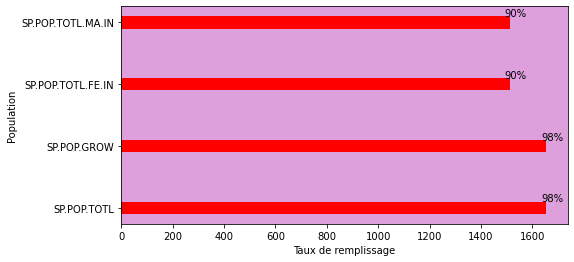

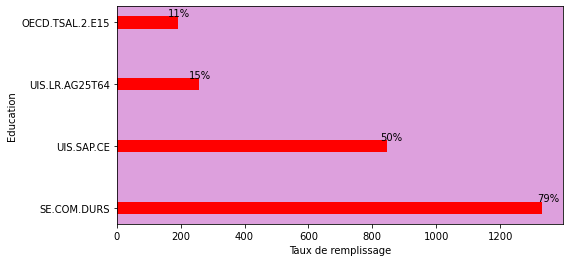

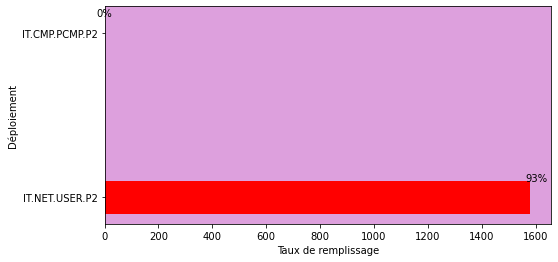

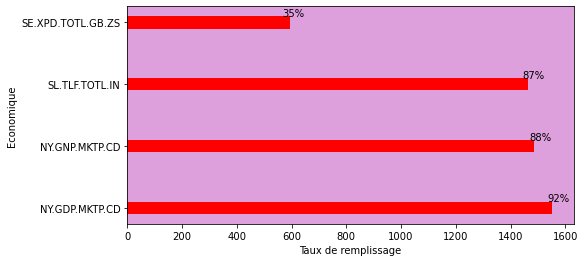

In [29]:
AllGroups=[Population,Education,Déploiement,Economique]
for x in AllGroups:
    indper(df3,x)

<div style="text-align: justify"><u>Donc, l'Indicateur le mieux rempli par sujet est :</u><br/>
    <br/> 
<b>1. Population :</b> 'Population growth (annual %)' (Indicator Code = <b>SP.POP.GROW)</b>.<br/>
<b>2. Education :</b> 'Duration of compulsory education (years)' (Indicator Code = <b>SE.COM.DURS</b>). <br/>
<b>3. Déploiement :</b> 'Internet users (per 100 people)' (Indicator Code = <b>IT.NET.USER.P2</b>).<br/>
<b>4. Economique : </b>'GDP at market prices (current US$)' (Indicator Code = <b>NY.GDP.MKTP.CD</b>).<br/>
</div>

In [30]:
IndBest=['SP.POP.GROW','SE.COM.DURS','IT.NET.USER.P2','NY.GDP.MKTP.CD']

<div style="text-align: justify"><u>Les dataframes finals par Indicateurs :</u></div>

In [31]:
dfpopf=final(df3.loc[df3['Indicator Code']=='SP.POP.GROW'])
dfeduf=final(df3.loc[df3['Indicator Code']=='SE.COM.DURS'])
dfdepf=final(df3.loc[df3['Indicator Code']=='IT.NET.USER.P2'])
dfecof=final(df3.loc[df3['Indicator Code']=='NY.GDP.MKTP.CD'])

<div style="text-align: justify"><u>Le DataFrame final de tous les indicateurs:</u></div>

In [32]:
dfIndB=final(df3.loc[df3['Indicator Code'].isin(IndBest)])

## <a name = "8">Remplir les données manquantes </a>

In [33]:
dfpopf.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
2011              1
2012              1
2013              1
2014              8
2015              8
2016              8
dtype: int64

<div style="text-align: justify">Dans le datafrname final Il existe des valeurs manquantes qu'on peut voir ses nombres au-dessus. Dans l'analyse de données on ne peut pas compléter l'analyse sans les remplir. Il existe plusieurs méthodes et comme le nombre des valeurs manquantes n'est pas très élevé, j'ai décidé d'utiliser la méthode de remplir par moyennes mais si le nombre de valeurs manquantes par ligne est élevé ou toutes les valeurs sont manquantes, Il faut mieux supprimer cette ligne. Le remplissage sera par ligne, car on rempli des données qui appartiennent à un seul pays et à un seul Indicateur. J'ai créé une fonction <b><i>fillbymean(df,NumberNan)</i></b> pour cet objectif, d'où: 

<b><i>df</i></b> : est le dataframe sur lequel on applique la fonction<br>
<b><i>NumberNan</i></b> : est le nombre de valeurs manquantes où on supprime la ligne (Je trouve que la valeur 4 est un bon choix. Car on a 7 valeurs et si on a 4 valeurs manquantes, la ligne sera supprimée) 
</div>

In [34]:
def fillbymean(df,NumberNan):

    Indexdrop=[]
    dfr=df.copy()
    dfr.index=list(range(len(dfr)))
        
    for x in dfr.index:
        if dfr.iloc[x,4:].isnull().sum() < NumberNan:
            dfr.iloc[x,4:]=dfr.iloc[x,4:].replace(np.nan,dfr.iloc[x,4:].mean())
        else: Indexdrop.append(x)

    for x in Indexdrop: 
        dfr.drop(x,inplace=True)

    return dfr

<div style="text-align: justify">
Un exemple de l'application de cette fonction :
</div>

In [35]:
fillbymean(dfeduf,4)

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
25,Afghanistan,AFG,Duration of compulsory education (years),SE.COM.DURS,9.0,9.0,9.0,9.0,9.0,9.0,9.0
26,Albania,ALB,Duration of compulsory education (years),SE.COM.DURS,8.0,8.0,9.0,9.0,9.0,9.0,9.0
27,Algeria,DZA,Duration of compulsory education (years),SE.COM.DURS,10.0,10.0,10.0,10.0,10.0,10.0,10.0
29,Andorra,AND,Duration of compulsory education (years),SE.COM.DURS,10.0,10.0,10.0,10.0,10.0,10.0,10.0
30,Angola,AGO,Duration of compulsory education (years),SE.COM.DURS,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...
234,Vietnam,VNM,Duration of compulsory education (years),SE.COM.DURS,9.0,9.0,9.0,9.0,9.0,10.0,10.0
236,West Bank and Gaza,PSE,Duration of compulsory education (years),SE.COM.DURS,10.0,10.0,10.0,10.0,10.0,10.0,10.0
237,"Yemen, Rep.",YEM,Duration of compulsory education (years),SE.COM.DURS,9.0,9.0,9.0,9.0,9.0,9.0,9.0
238,Zambia,ZMB,Duration of compulsory education (years),SE.COM.DURS,7.0,7.0,7.0,7.0,7.0,7.0,7.0


<div style="text-align: justify">
Et pour vérifier qu'il n'a pas des valeurs manquantes :
</div>

In [36]:
fillbymean(dfeduf,4).isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
2010              0
2011              0
2012              0
2013              0
2014              0
2015              0
2016              0
dtype: int64

## <a name = "9"> Vérifier la qualité de remplissage par Z-Score  </a>

<div style="text-align: justify">
Après avoir rempli les valeurs manquantes, Il est important de vérifier si le résultat est correct ou non. Pour cela, on peut utiliser des méthodes statistiques. J'ai trouvé que la méthode de Z-Score est une bonne méthode car il combine l'utilisation de la moyenne et la variance en même temps. Cela nous permet d'avoir un résultat plus précis et plus facile à lire avec les valeurs de Z-Score.La fonction <b><i>checkbyzscore()</i></b> nous donne Z-Score de tous les points visualisé sur une figure.
</div>

In [37]:
def checkbyzscore(df):
  
    npoints=[]
    Years=['2010','2011','2012','2013','2014','2015','2016']
    fig=plt.figure(figsize=(12, 4))
    ax = plt.axes()
    ax.set_facecolor('snow') 

    Index=list(range(len(df))) 
    for x in Index:
        dfz=list(df.iloc[x,4:])
        Zforraw=stats.zscore(dfz)
        npoints.append(len(Zforraw))
        fig=plt.scatter(Years,Zforraw,color='crimson',s=4)

    
    fig=plt.xlabel('Years')
    fig=plt.ylabel('Zscore')

    return fig,sum(npoints)


<div style="text-align: justify">
On n'a pas besoin de vérifier pour chaque Indicateur. On peut vérifier tous les Indicateurs ensemble avec le DataFrame dfIndB
</div>

(Text(0, 0.5, 'Zscore'), 6174)

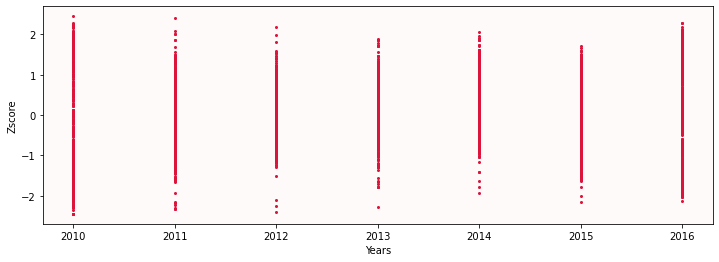

In [38]:
dfIndBF=fillbymean(dfIndB,4)
checkbyzscore(dfIndBF)

<div style="text-align: justify">
On remarque que 6174 est le nombre total des points sur la figure. Le Z-Score est entre -2 à 2. Un peu de points ne sont pas dans le même intervalle. Donc, notre remplissage est correct. 
</div>

## <a name = "10"> Scoring: Trouver les pays les plus potentiels  </a>

### <a name = "101">Filtrer les vrais pays</a>

<div style="text-align: justify">
Si on regarde les noms de pays dans le DataFrame dfIndBF, on remarque qu'il y a des noms qui ne sont pas vraiment des pays à étudier. Par exemple, le nom 'High income'. On va trouver ces noms en lisant les noms de tous les pays. 
</div>

In [40]:
dfIndBF['Country Name'].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


<div style="text-align: justify">
Les noms des pays à éliminer sont mis dans <i>NotRealCountries</i>, et le DataFrame sera <i>dfIndBFR</i> :  
</div>

In [43]:
NotRealCountries = ['High income','Low & middle income', 'Low income', 'Lower middle income','Middle income','OECD members','Upper middle income', 'World']
NotRealCountries_Codes=['HIC','LMY','LIC','LMC','MIC','OED','UMC','WLD']
dfIndBFR=dfIndBF.loc[~dfIndBF['Country Code'].isin(NotRealCountries_Codes)]

### <a name = "102">Uniformiser les Indicateurs</a>

<div style="text-align: justify">
L'uni-formalisation nous permet d'avoir des résultats entre 0 et 1. Cela permet de lire les données plus facilement pour comprendre et comparer les chiffres. Et ce sera très utile pour comprendre le résultat de Scoring. La fonction <b><i>normalize(df,decimal)</i></b> uniformise les données par ligne, d'où:<br>
    
<b><i>decimal:</i></b>  est le nombre des nombres après la virgule  

</div>

In [41]:
def normalize(df,decimal):
   
    dfc=df.copy()
    dfc.index=list(range(len(dfc))) 
    Index=list(range(len(dfc))) 
    scaler = MinMaxScaler()
    dfScaler0=[]
    
    for x in Index:
        data=pd.DataFrame(dfc.iloc[x,4:])
        scaler.fit(data)
        Result=scaler.transform(data).round(decimal).T
        dfScaler0.append(pd.Series(Result[0]))
        dfScaler=pd.DataFrame(dfScaler0)
        
    dfScaler.columns=dfc.columns[4:]
    dfScaler=pd.concat([dfc.iloc[:,:4],dfScaler],axis=1)
     
    return dfScaler

In [44]:
dfIndBFRN=normalize(dfIndBFR,3)
dfIndBFRN

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,2016
0,Arab World,ARB,GDP at market prices (current US$),NY.GDP.MKTP.CD,0.0,0.516,0.856,1.000,0.593,0.593,0.593
1,Arab World,ARB,Internet users (per 100 people),IT.NET.USER.P2,0.0,0.293,0.718,1.000,0.503,0.503,0.503
2,Arab World,ARB,Population growth (annual %),SP.POP.GROW,1.0,0.529,0.235,0.000,0.441,0.441,0.441
3,East Asia & Pacific,EAS,GDP at market prices (current US$),NY.GDP.MKTP.CD,0.0,0.487,0.736,0.780,0.895,0.871,1.000
4,East Asia & Pacific,EAS,Internet users (per 100 people),IT.NET.USER.P2,0.0,0.169,0.349,0.557,0.678,0.838,1.000
...,...,...,...,...,...,...,...,...,...,...,...
853,Zambia,ZMB,Population growth (annual %),SP.POP.GROW,0.0,0.428,0.777,0.979,1.000,0.898,0.762
854,Zimbabwe,ZWE,Duration of compulsory education (years),SE.COM.DURS,0.0,0.000,0.000,0.000,0.000,0.000,0.000
855,Zimbabwe,ZWE,GDP at market prices (current US$),NY.GDP.MKTP.CD,0.0,0.302,0.633,0.820,0.887,0.951,1.000
856,Zimbabwe,ZWE,Internet users (per 100 people),IT.NET.USER.P2,0.0,0.120,0.335,0.544,0.596,0.977,1.000


<div style="text-align: justify">
    <b><i>dfIndBFRN</i></b> est le DataFrame avec les meilleurs Indicateurs, final, rempli, et uniformisé.
</div>

### <a name = "103">Faire le Scoring</a>

<div style="text-align: justify">
L'idée de Scoring est de calculer la moyenne de données de chaque pays pour tous les Indicateurs, et cela permet de trouver quel pays qui est le plus important. Car d'une manière approximative, on peut dire que si la moyenne est plus grande, c'est à dire qu'on a plus de données. Il n'est pas possible d'être dépendent sur cette manière approximative. C'est pour cela, on va vérifier cette idée avec la fonction <b><i>def scoring_pays(df)</i></b> en intégrant le nombre de données pour chaque moyenne calculée.  Pour chaque pays, on peut avoir deux valeurs: la moyenne de ses données et le nombre de ses données. La fonction <b><i>def scoring_pays(df)</i></b> donne le résultat de la moyenne de ces deux valeurs. 

</div>

In [45]:
def scoring_pays(df):
    
    Mean=[]
    NumberofCells=[]
    dfr=df.copy()
    CountriesCodes=dfr['Country Code'].unique()
    CountryNames=dfr['Country Name'].unique()
    
    for x in CountriesCodes:
        dfCountry=dfr.loc[dfr['Country Code']==x]
        dfmean=dfCountry.iloc[:,4:]
        Mean.append(dfmean.sum().sum()/dfmean.size)
        NumberofCells.append(dfmean.count().sum())
        
    NumberofCellsToN=pd.Series(NumberofCells)
    NumberofCellsNormalize=NumberofCellsToN.apply(lambda x:(x-min(NumberofCellsToN))/(max(NumberofCellsToN)-min(NumberofCellsToN)))
    Score=(NumberofCellsNormalize+Mean)/2
    dforder=pd.DataFrame(columns=['Country Code','Country Name','Score'])
    dforder['Country Code']= CountriesCodes
    dforder['Country Name']= CountryNames
    dforder['Score']=Score
    dforder['Score']=dforder['Score'].round(3)
    dforder=dforder.sort_values(by=['Score'],ascending=False)
    dforder.index=list(range(len(dforder)))

    return dforder

In [46]:
scoring_pays(dfIndBFRN)

,Country Code,Country Name,Score
0,PRY,Paraguay,0.829
1,ALB,Albania,0.813
2,ARM,Armenia,0.810
3,BGR,Bulgaria,0.806
4,ECU,Ecuador,0.806
...,...,...,...
227,TCA,Turks and Caicos Islands,0.295
228,ERI,Eritrea,0.292
229,MAF,St. Martin (French part),0.251
230,CUW,Curacao,0.236


<div style="text-align: justify">
Donc, dans ce tableau final qui le résultat de toutes les analyses. On trouve que les premiers et meilleurs pays pour investir sont : Paraguay, Albania, Armenia, Bulgaria...
</div>

## <a name = "11">Conclusion générale</a>

   <div style="text-align: justify">
    Prendre une décision en analysant les données nécessite une compréhension des données qu'on possède, et une approche à suivre. C'est pour cela, on a commencé le projet en explorant les données. Ensuite choisir quelles données qui répondent au mieux à la demande du Manager. Ces données sont classées grâce  à des indicateurs. Après ce choix, on a découvert qu'on peut améliorer l'analyse en trouvant la période d'étude et les pays à étudier, parce qu'il y a des pays qui n'ont aucunes données, et pareil pour la période sans oublier qu'on s'intéresse à une période récente pour le projet. </div> 
    <div style="text-align: justify">    
    Après avoir choisi les pays et la période, on va plus loin et on cherche les indicateurs les mieux remplis pour un seul indicateur. Pour continuer la procédure, ce n'est pas possible de continuer sans remplir les données manquantes. Donc, on rempli le DataFrame final. A la fin, on commence l'analyse sur le DataFrame final pour en tirer le résultat final. </div>
    <div style="text-align: justify">
    Ce projet est le deuxième projet sur OpenClassroom, et il est le premier projet réel du métier DataScientist. Grâce à ce projet, j'ai appris plein de bases importantes pour ce métier. J'ai appris comment utiliser Jupyter pour le codage, et comment l'utiliser comme Jupyter Notebook pour rédiger ce rapport. J'ai appris l'utilisation des librairies de Pandas, Numpy, Matplotlib,... . 
Egalement, j'ai appris comment créer des fonctions pour ne pas répéter le codage à chaque fois, et plein de détails du codage de Python. </div>
    <div style="text-align: justify">
    Tout ce que j'ai appris est devenue une base solide et importante que je ne le possédais pas avant cette formation. En réalité, je ne pouvais pas arriver à ce niveau sans OpenClassroom et sans le guidage de mon tuteur sur OpenClassroom. Avec mon tuteur, j'ai réussi à améliorer la qualité de mes codes, Il m'a donné des idées pour ne pas utiliser des méthodes faibles dans mes codes. </div>
    <div style="text-align: justify">
    Je suis content d'avoir finalisé ce projet, et je suis impatient pour la suite. J'aimerais avoir plus de codes et plus de calculs de ce type. Je suis optimiste pour la suite parce que je suis devenu plus à l'aise avec les outils et le Jupyter et tout ce que j'ai besoin. De même, je suis habitué à la méthode de travail pour ce genre de formation. J'ai amélioré ma connexion Internet, mes outils... .
Pour toutes ces raisons, la suite sera forcément mieux, et plus vite parce que j'ai amélioré tous ces détails qui étaient indispensables pour ce métier. Et à la fin, mon but est de respecter les délais de la formation OpenClassroom pour finir à temps et pour respecter le programme.  
</div>